<a href="https://colab.research.google.com/github/clevercatme/Image_processing_using_python/blob/main/Canny_edge_assignent_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

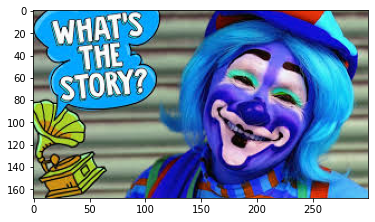

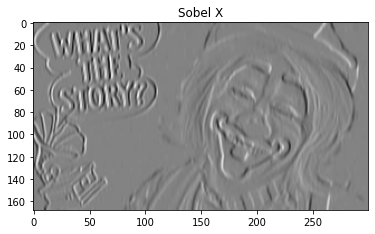

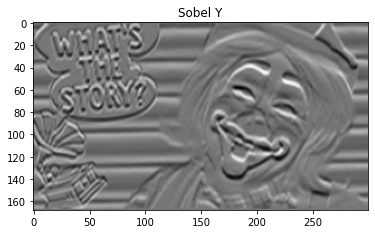

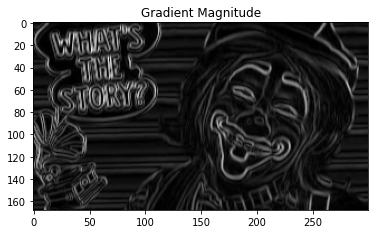

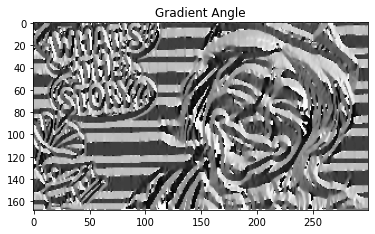

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image 'clown.jpeg' and display it
image = cv2.imread('/content/clown.jpeg')
plt.imshow(image)
plt.show()

# Convert it into a grayscale image
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# To suppress the noise, use a Gaussian kernel to smoothen it
kernel_size = 5 # choose a kernel size
sigma = 1.5 # choose a standard deviation
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
smoothed_image = cv2.filter2D(image_gray, -1, gaussian_kernel)

# Apply the standard Sobel operator Gx and Gy
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

# Display the filtered outputs
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.show()
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.show()

# Show the gradient magnitude and angle images
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
angle = np.arctan2(sobel_y, sobel_x)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()
plt.imshow(angle, cmap='gray')
plt.title('Gradient Angle')
plt.show()

# Apply non-maximum suppression
suppressed_image = np.zeros_like(magnitude)
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        # Locate the image pixels which are spatially closest to the imaginary gray pixels
        # and use those pixels as the neighboring pixels for non-maxima suppression
        neighbors = [(i-1, j-1), (i-1, j), (i-1, j+1), (i, j-1), (i, j+1), (i+1, j-1), (i+1, j)]
